<a href="https://colab.research.google.com/github/Mayu-infinite/Practice/blob/main/B23ES1026_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1.
### 1.Load the Dataset and perform necessary pre processing.
(Deal with missing/NaN
values, perform input normalization, converting categorical data to numerical
data. Mention the steps in the report)
2. Perform Exploratory Data Analysis and write your observations in the report.
3. Split the data into train and test splits.

In [ ]:
%matplotlib inline
import pandas as pd

# Loading the dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(df.isna().sum())
df.shape

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


(768, 9)

In [ ]:
# This means there are no null values but there might be zeros which will be unrealistic so need to work on it
# Replace zeros in specific columns with NaN to indicate missing values
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA)

# Filling NaN with the mean of each column
df.fillna(df.mean(), inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to make all features to the same scale
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


In [ ]:
# the Output column is already 0 or 1 so no further encoding is needed.
# Display basic statistics of the dataset
print(df_scaled.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.501205       0.493930       0.240798    0.170130   
std       0.198210    0.196361       0.123432       0.095554    0.102189   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.359677       0.408163       0.195652    0.129207   
50%       0.176471    0.470968       0.491863       0.240798    0.170130   
75%       0.352941    0.620968       0.571429       0.271739    0.170130   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.291564                  0.168179    0.204015    0.348958  
std      0.140596                  0.141473    0.196004    0.476951  
min      0.000000                  

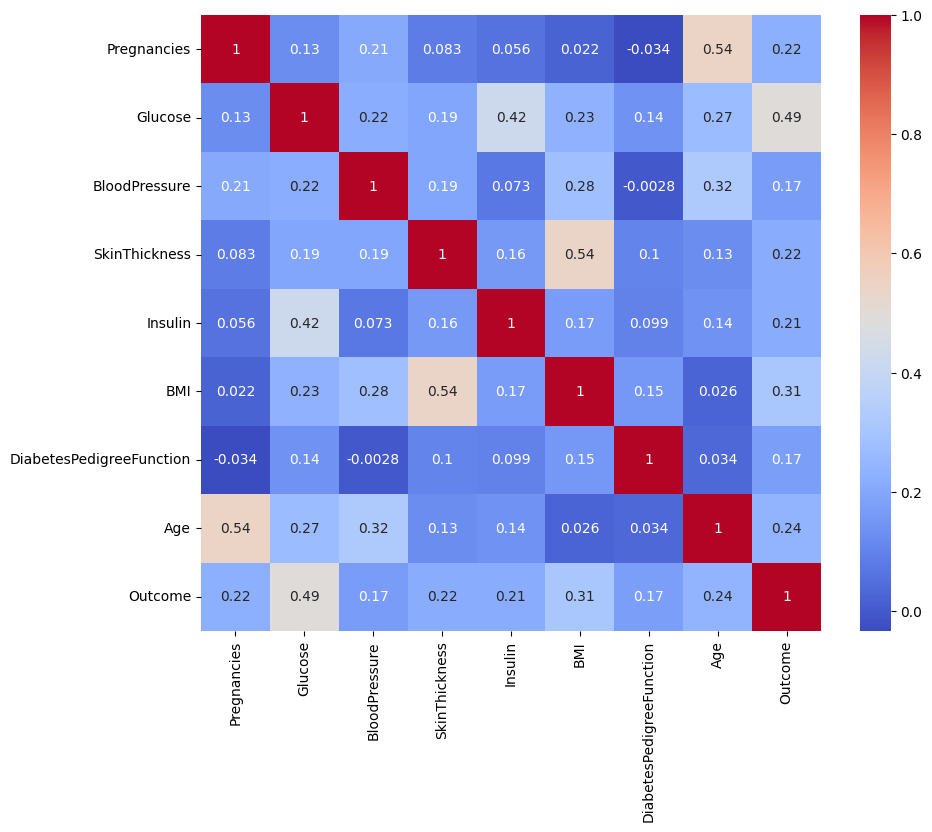

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()


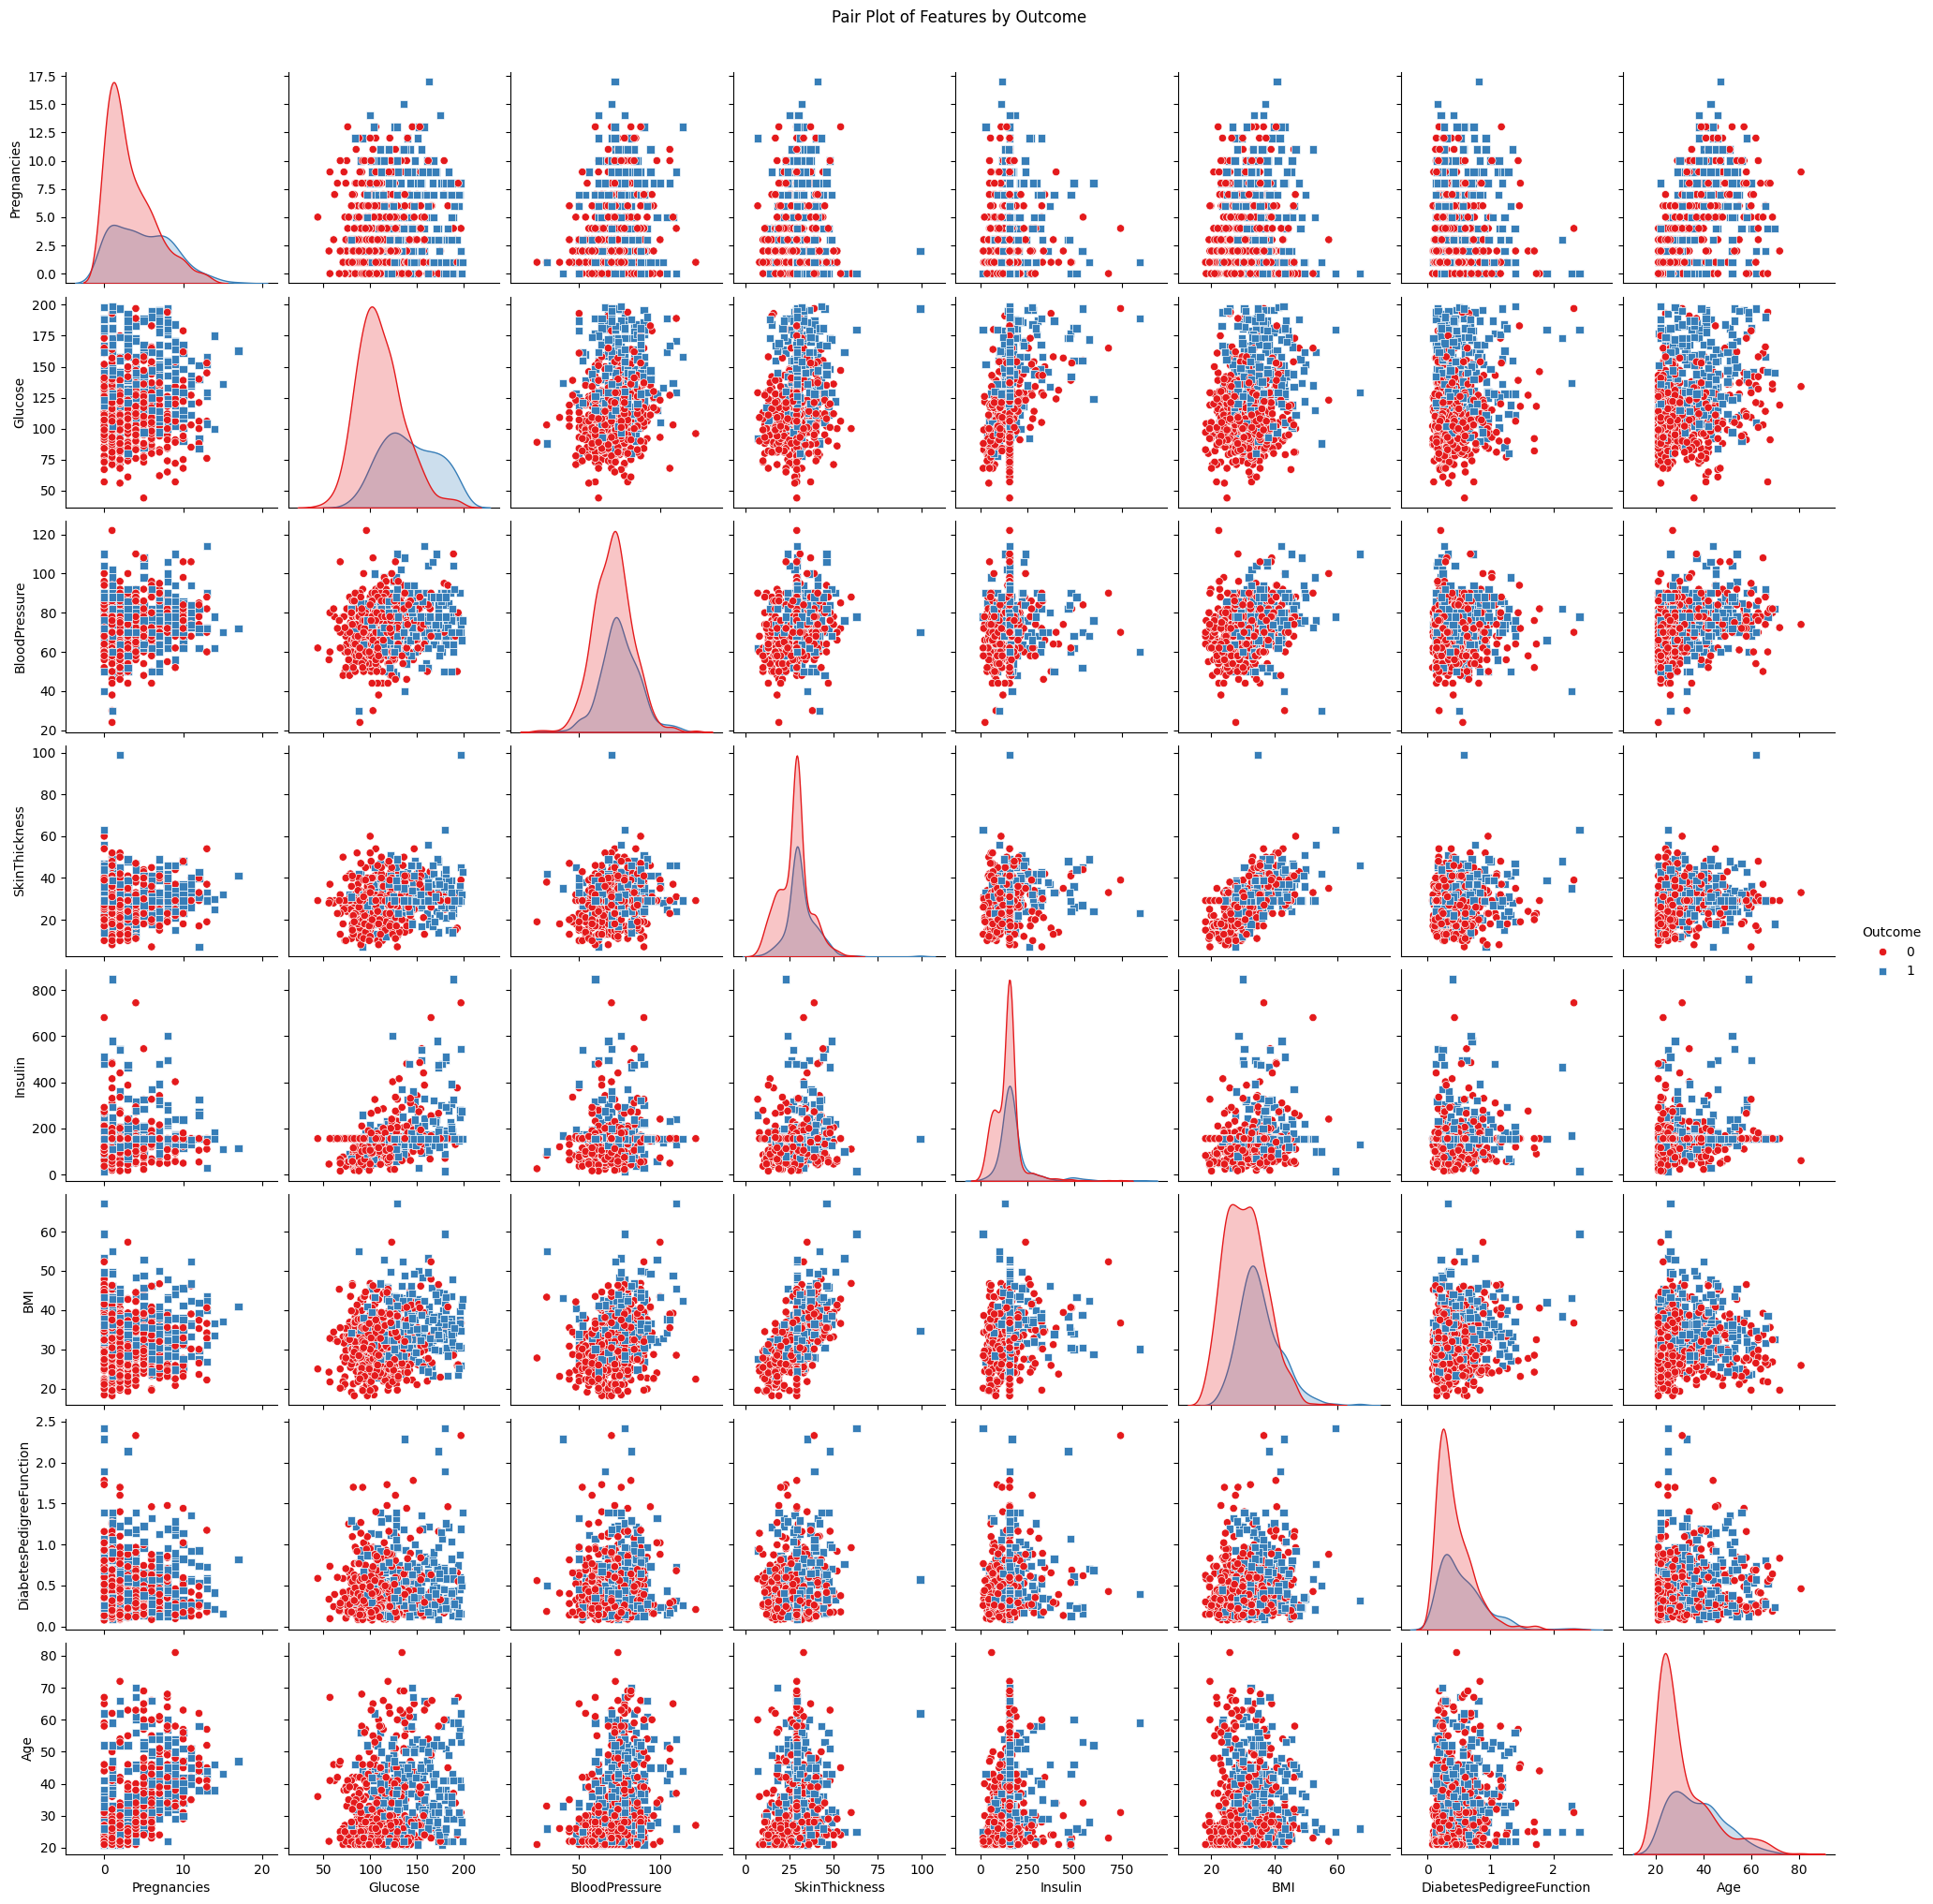

In [ ]:
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], palette="Set1")
plt.suptitle('Pair Plot of Features by Outcome', y=1.02)
plt.show()


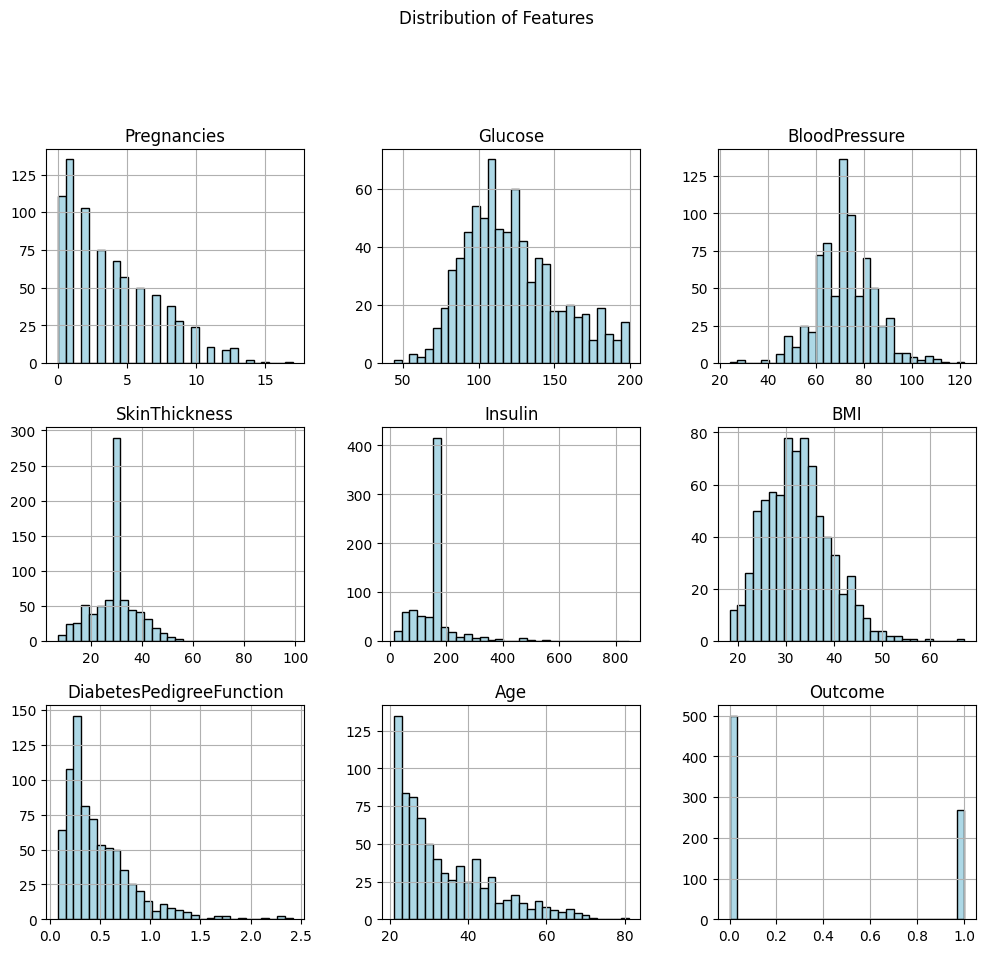

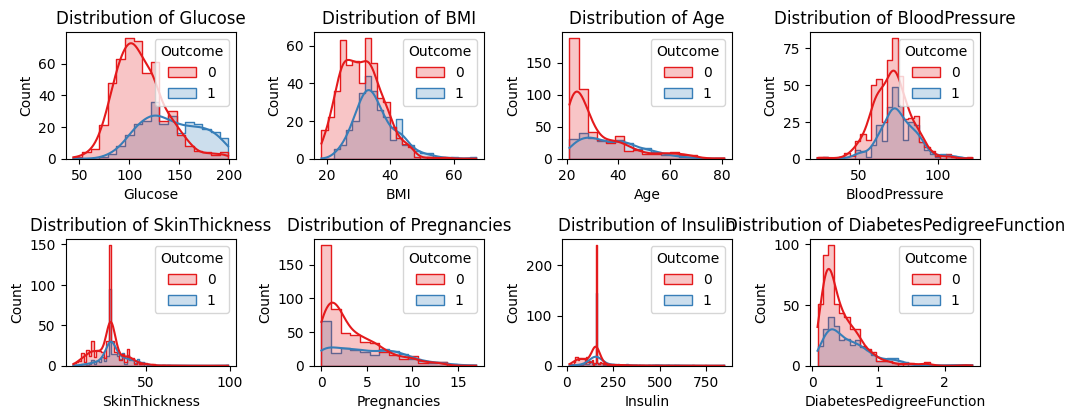

In [ ]:
# Plotting histograms for features
df.hist(figsize=(12, 10), bins=30, color='lightblue', edgecolor='black')
plt.suptitle('Distribution of Features', y=1.02)
plt.show()

# Distribution of key features by Outcome
features = ['Glucose', 'BMI', 'Age', 'BloodPressure','SkinThickness','Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']

plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, palette='Set1', element="step")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

<ipython-input-191-1d4e2a382a4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Glucose', palette='Set1')


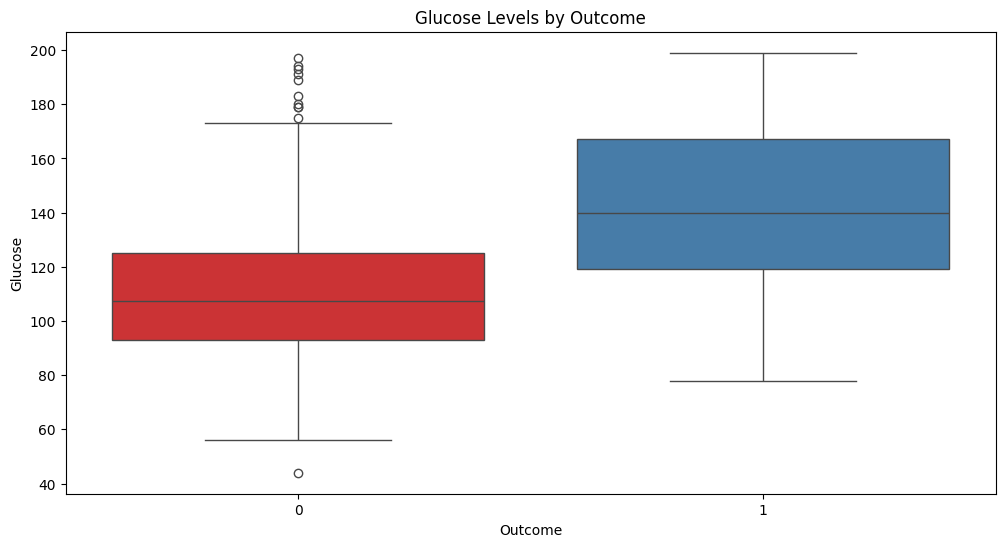

<ipython-input-191-1d4e2a382a4b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='BMI', palette='Set1')


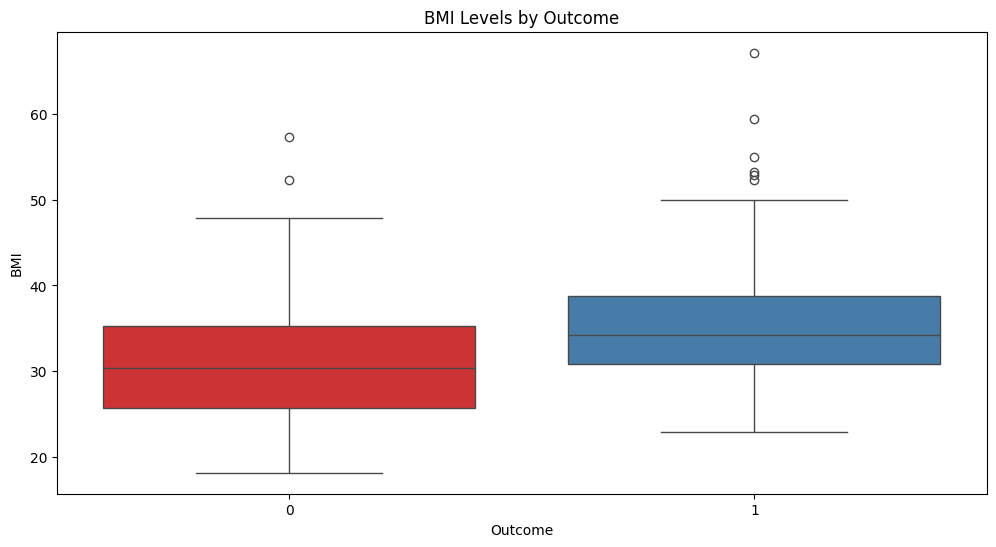

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Outcome', y='Glucose', palette='Set1')
plt.title('Glucose Levels by Outcome')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Outcome', y='BMI', palette='Set1')
plt.title('BMI Levels by Outcome')
plt.show()


<ipython-input-192-0d7787d53a66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set1')


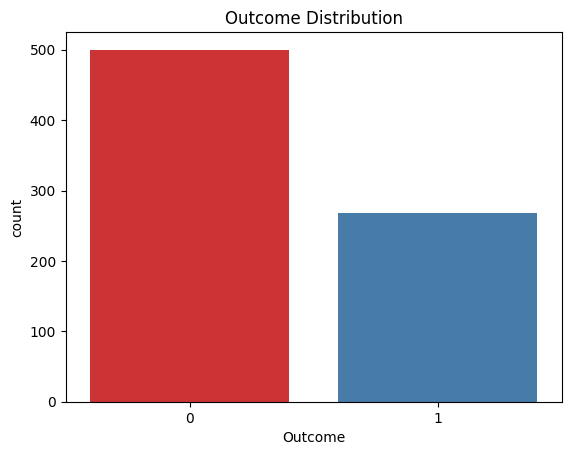

In [ ]:
# Countplot of Outcome
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title('Outcome Distribution')
plt.show()

In [ ]:
# This means dataset is not having ony one category as dominating in number
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

# 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Question 2.
1. Implement logistic function (sigmoid).


In [ ]:
import numpy as np

def sigmoid(z):
    """
    Compute the sigmoid of z.

    Args:
    z -- A scalar or numpy array

    Returns:
    s -- sigmoid(z)
    """
    return 1 / (1 + np.exp(-z))


2. Implement binary cross entropy cost function.

In [ ]:
def binary_cross_entropy(y_true, y_pred):
    """
    Compute the binary cross entropy loss.

    Args:
    y_true -- Actual true labels
    y_pred -- Predicted probabilities

    Returns:
    loss -- Binary cross entropy loss
    """
    m = len(y_true)
    loss = -1/m * (np.dot(y_true, np.log(y_pred)) + np.dot(1-y_true, np.log(1-y_pred)))
    return loss


3. Implement L1 loss and L2 loss functions from scratch.

In [ ]:
def l1_loss(weights, lambda_):
    """
    Compute the L1 regularization loss.

    Args:
    weights -- Model weights
    lambda_ -- Regularization strength

    Returns:
    loss -- L1 loss
    """
    return lambda_ * np.sum(np.abs(weights))


In [ ]:
def l2_loss(weights, lambda_):
    """
    Compute the L2 regularization loss.

    Args:
    weights -- Model weights
    lambda_ -- Regularization strength

    Returns:
    loss -- L2 loss
    """
    return lambda_ * np.sum(np.square(weights))


4. Implement the Logistic Regression algorithm for classification from scratch.
5. Make sure that it should:
○ Be a class that stores weights and bias of the model.
○ Should be able to perform gradient descent to update the model.
○ Should be able to store loss over iterations and display the loss curve.
○ Should be able to perform prediction on a single datapoint as well as
multiple data points.
○ Should take “number of iterations”, “learning rate”, “threshold” and
“regularization” as input.

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, threshold=0.5, regularization=None, lambda_=0.1):
        """
        Initializing logistic regression model.

        Args:
        learning_rate -- learning rate for gradient descent
        num_iterations -- number of iterations to run gradient descent
        threshold -- classification threshold (default is 0.5)
        regularization -- None, 'l1', or 'l2' for regularization
        lambda_ -- regularization strength
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.threshold = threshold
        self.regularization = regularization
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.losses = []

    def initialize_parameters(self, n_features):
        """Initialize weights and bias."""
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_loss(self, y_true, y_pred):
        """Compute the total loss (binary cross-entropy + regularization)."""
        loss = binary_cross_entropy(y_true, y_pred)

        if self.regularization == 'l1':
            loss += l1_loss(self.weights, self.lambda_)
        elif self.regularization == 'l2':
            loss += l2_loss(self.weights, self.lambda_)

        return loss

    def gradient_descent(self, X, y_true, y_pred):
        """Perform gradient descent to update the weights and bias."""
        m = X.shape[0]

        # Computing gradients
        dw = np.dot(X.T, (y_pred - y_true)) / m
        db = np.sum(y_pred - y_true) / m

        # Applying regularization to gradients
        if self.regularization == 'l1':
            dw += self.lambda_ * np.sign(self.weights) / m
        elif self.regularization == 'l2':
            dw += 2 * self.lambda_ * self.weights / m

        # Updating weights and bias
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        """Fit the model to the data."""
        self.initialize_parameters(X.shape[1])

        for i in range(self.num_iterations):
            # Predicting probabilities
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            # Computing loss
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

            # Performing gradient descent
            self.gradient_descent(X, y, y_pred)

            # Display loss every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss}")

    def predict_proba(self, X):
        """Predict probabilities for the input data."""
        z = np.dot(X, self.weights) + self.bias
        return sigmoid(z)

    def predict(self, X):
        """Predict class labels for input data."""
        probabilities = self.predict_proba(X)
        return (probabilities >= self.threshold).astype(int)

    def plot_loss(self):
        """Plot the loss curve."""
        import matplotlib.pyplot as plt
        plt.plot(self.losses)
        plt.title('Loss Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.grid(True)  # Add a grid for better visualization
        plt.show()


6. Experiment with different regularization techniques and no regularization. Also
try to tune threshold to get the best results.

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.6718903090397639
Iteration 200: Loss = 0.6615868076369751
Iteration 300: Loss = 0.6557511434731952
Iteration 400: Loss = 0.6517770971717745
Iteration 500: Loss = 0.6486043890346933
Iteration 600: Loss = 0.645795050000026
Iteration 700: Loss = 0.6431656906125293
Iteration 800: Loss = 0.6406385613835512
Iteration 900: Loss = 0.6381802227941162
Iteration 1000: Loss = 0.6357759626003805
Iteration 1100: Loss = 0.6334190258429113
Iteration 1200: Loss = 0.6311060527446337
Iteration 1300: Loss = 0.6288351386856721
Iteration 1400: Loss = 0.6266050073769548
Iteration 1500: Loss = 0.6244146581366381
Iteration 1600: Loss = 0.6222632154301297
Iteration 1700: Loss = 0.6201498647513894
Iteration 1800: Loss = 0.618073825345693
Iteration 1900: Loss = 0.6160343386286163


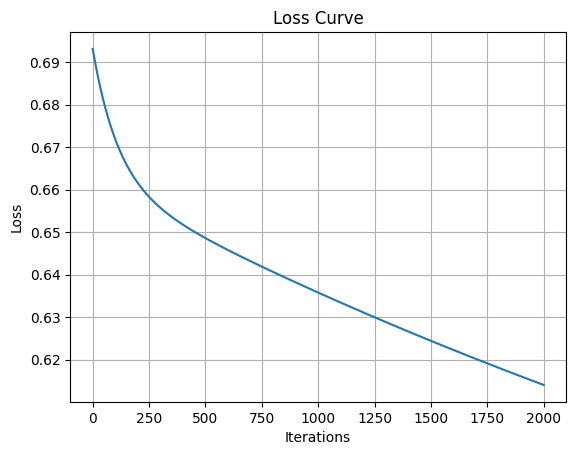

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.5957467090185588
Iteration 200: Loss = 0.5562590963702879
Iteration 300: Loss = 0.5313128000025455
Iteration 400: Loss = 0.5146799832931318
Iteration 500: Loss = 0.5030813568432865
Iteration 600: Loss = 0.49469782726104156
Iteration 700: Loss = 0.4884619733887814
Iteration 800: Loss = 0.4837147848226593
Iteration 900: Loss = 0.4800312957055898
Iteration 1000: Loss = 0.47712722630697085
Iteration 1100: Loss = 0.47480644520538245
Iteration 1200: Loss = 0.47293005367219504
Iteration 1300: Loss = 0.4713974662296887
Iteration 1400: Loss = 0.470134429882247


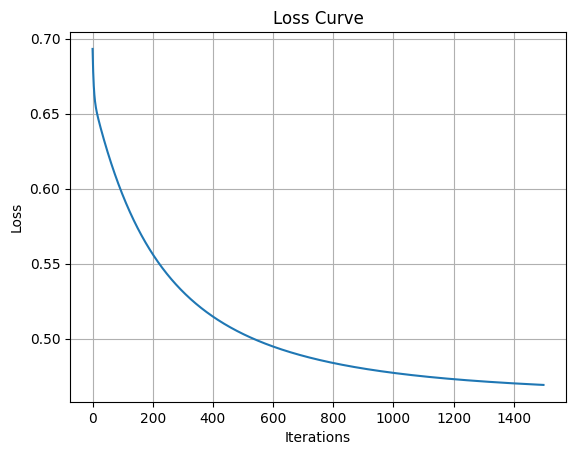

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.5673170064320922
Iteration 200: Loss = 0.525005320037145
Iteration 300: Loss = 0.5030492573076031
Iteration 400: Loss = 0.49032508760524124
Iteration 500: Loss = 0.48236756556229976
Iteration 600: Loss = 0.4771140441406793
Iteration 700: Loss = 0.4735029238034595
Iteration 800: Loss = 0.4709418056184695
Iteration 900: Loss = 0.4690791373294057
Iteration 1000: Loss = 0.4676960219942183
Iteration 1100: Loss = 0.4666508106804895
Iteration 1200: Loss = 0.46584890583478733
Iteration 1300: Loss = 0.465225449699876
Iteration 1400: Loss = 0.4647349743574501


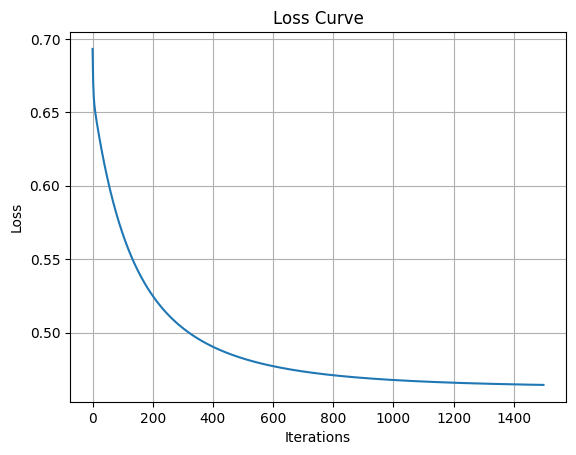

In [ ]:
# Experiment 1: No Regularization
model = LogisticRegression(learning_rate=0.01, num_iterations=2000, regularization=None)
model.fit(X_train, y_train)
model.plot_loss()

model = LogisticRegression(learning_rate=0.3, num_iterations=1500, regularization=None)
model.fit(X_train, y_train)
model.plot_loss()

model = LogisticRegression(learning_rate=0.5, num_iterations=1500, regularization=None)
model.fit(X_train, y_train)
model.plot_loss()

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.6860320715562677
Iteration 200: Loss = 0.6829415977551935
Iteration 300: Loss = 0.6799759063202125
Iteration 400: Loss = 0.6780819539765138
Iteration 500: Loss = 0.6795512743058392
Iteration 600: Loss = 0.6823740136840685
Iteration 700: Loss = 0.6861476063412884
Iteration 800: Loss = 0.6905704988516423
Iteration 900: Loss = 0.6959477912756576
Iteration 1000: Loss = 0.701895162250475
Iteration 1100: Loss = 0.7078691304181096
Iteration 1200: Loss = 0.7138454571155928
Iteration 1300: Loss = 0.719808910112774
Iteration 1400: Loss = 0.725749804743798
Iteration 1500: Loss = 0.7316619431703095
Iteration 1600: Loss = 0.7375413513346206
Iteration 1700: Loss = 0.7433854883207501
Iteration 1800: Loss = 0.7491927438944707
Iteration 1900: Loss = 0.7549621157950894


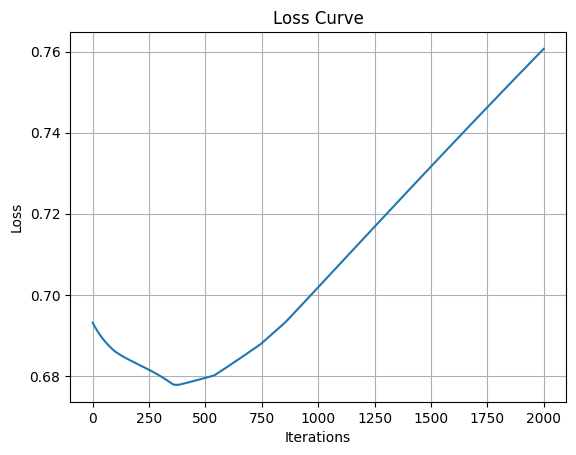

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.6795715918477669
Iteration 200: Loss = 0.7019016002847374
Iteration 300: Loss = 0.7316840332396144
Iteration 400: Loss = 0.7607217810160428
Iteration 500: Loss = 0.7897117828498298
Iteration 600: Loss = 0.8194865657279562
Iteration 700: Loss = 0.8482865282667063
Iteration 800: Loss = 0.8761349164814053
Iteration 900: Loss = 0.9030614393040981
Iteration 1000: Loss = 0.9290975605021614
Iteration 1100: Loss = 0.9542754488940299
Iteration 1200: Loss = 0.9786274586019663
Iteration 1300: Loss = 1.0021857542491943
Iteration 1400: Loss = 1.0249820231926894


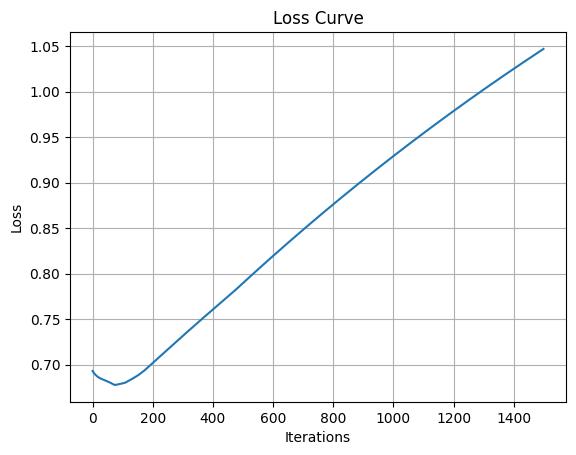

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.7019055592321471
Iteration 200: Loss = 0.7607537393213132
Iteration 300: Loss = 0.8195287729459498
Iteration 400: Loss = 0.8761861605060381
Iteration 500: Loss = 0.9291560499091349
Iteration 600: Loss = 0.978691670851117
Iteration 700: Loss = 1.025050666686242
Iteration 800: Loss = 1.0684835828023826
Iteration 900: Loss = 1.1092275875529616


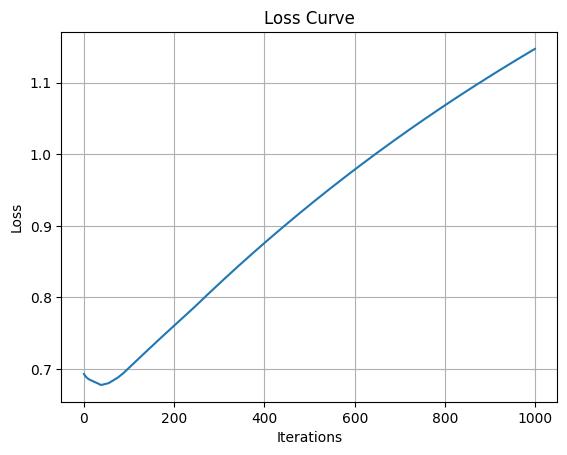

In [ ]:
# Experiment 2: L1 Regularization
model_l1 = LogisticRegression(learning_rate=0.01, num_iterations=2000, regularization='l1', lambda_=0.1)
model_l1.fit(X_train, y_train)
model_l1.plot_loss()

model_l1 = LogisticRegression(learning_rate=0.05, num_iterations=1500, regularization='l1', lambda_=0.1)
model_l1.fit(X_train, y_train)
model_l1.plot_loss()

model_l1 = LogisticRegression(learning_rate=0.1, num_iterations=1000, regularization='l1', lambda_=0.1)
model_l1.fit(X_train, y_train)
model_l1.plot_loss()

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.672323840007296
Iteration 200: Loss = 0.6626656115586539
Iteration 300: Loss = 0.6573788861945984
Iteration 400: Loss = 0.6539027321579417
Iteration 500: Loss = 0.6512892744973496
Iteration 600: Loss = 0.6491980608368096
Iteration 700: Loss = 0.6475129579518616
Iteration 800: Loss = 0.6461969933789502
Iteration 900: Loss = 0.6452384402973709
Iteration 1000: Loss = 0.6446317581312492
Iteration 1100: Loss = 0.6443715698341208
Iteration 1200: Loss = 0.6444512694661355
Iteration 1300: Loss = 0.6448630935355469
Iteration 1400: Loss = 0.6455985250828566
Iteration 1500: Loss = 0.646648671566668
Iteration 1600: Loss = 0.6480045350962181
Iteration 1700: Loss = 0.649657182178604
Iteration 1800: Loss = 0.6515978404457143
Iteration 1900: Loss = 0.6538179481196307


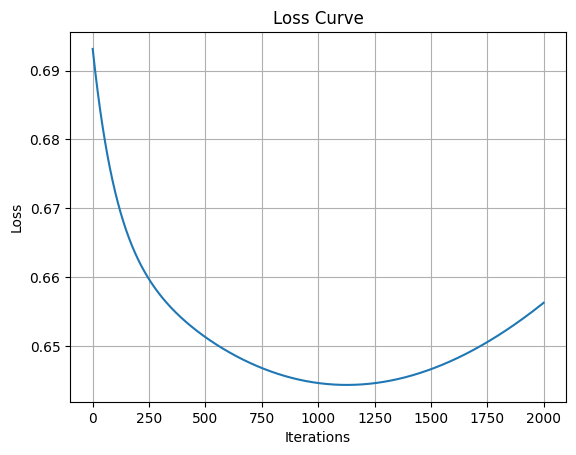

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.6626478577800118
Iteration 200: Loss = 0.6538978610145583
Iteration 300: Loss = 0.6491966388841869
Iteration 400: Loss = 0.6461961143375488
Iteration 500: Loss = 0.6446311536549431
Iteration 600: Loss = 0.6444511136727273
Iteration 700: Loss = 0.6455989575170802
Iteration 800: Loss = 0.648005634873329
Iteration 900: Loss = 0.6515996593424991
Iteration 1000: Loss = 0.656311757473004
Iteration 1100: Loss = 0.6620762377089693
Iteration 1200: Loss = 0.6688311189867134
Iteration 1300: Loss = 0.6765179180683458
Iteration 1400: Loss = 0.6850813937738733
Iteration 1500: Loss = 0.694469321451513
Iteration 1600: Loss = 0.7046323030595206
Iteration 1700: Loss = 0.7155236036965599
Iteration 1800: Loss = 0.7270990057847837
Iteration 1900: Loss = 0.7393166751055156


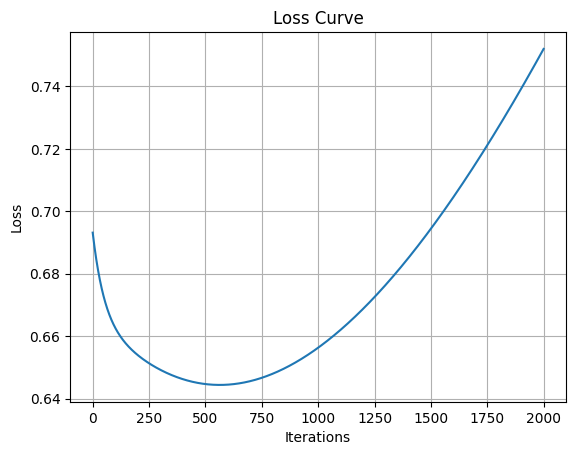

Iteration 0: Loss = 0.6931471805599452
Iteration 100: Loss = 0.6902004288898121
Iteration 200: Loss = 0.6874963833464508
Iteration 300: Loss = 0.6850131799408068
Iteration 400: Loss = 0.6827308835750348
Iteration 500: Loss = 0.6806313306861771
Iteration 600: Loss = 0.6786979820267042
Iteration 700: Loss = 0.6769157855271146
Iteration 800: Loss = 0.675271049025457
Iteration 900: Loss = 0.6737513225314395
Iteration 1000: Loss = 0.6723452896105927
Iteration 1100: Loss = 0.6710426674197618
Iteration 1200: Loss = 0.6698341148931268
Iteration 1300: Loss = 0.6687111485630651
Iteration 1400: Loss = 0.6676660654984288
Iteration 1500: Loss = 0.6666918728508965
Iteration 1600: Loss = 0.6657822235153026
Iteration 1700: Loss = 0.6649313574301259
Iteration 1800: Loss = 0.6641340480679299
Iteration 1900: Loss = 0.6633855536911902
Iteration 2000: Loss = 0.6626815729756024
Iteration 2100: Loss = 0.6620182046298566
Iteration 2200: Loss = 0.6613919106674486
Iteration 2300: Loss = 0.6607994830119294
Itera

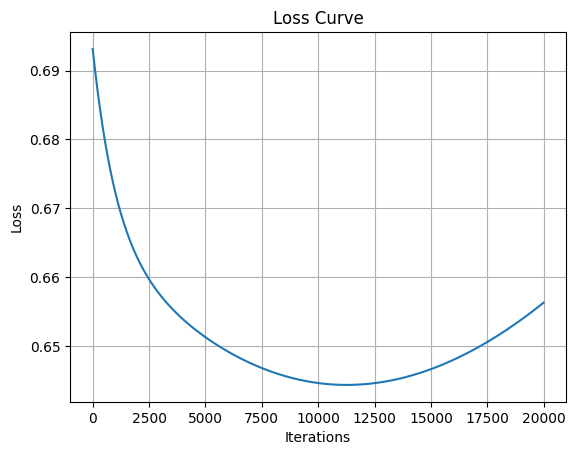

In [ ]:
# Experiment 3: L2 Regularization
model_l2 = LogisticRegression(learning_rate=0.01, num_iterations=2000, regularization='l2', lambda_=0.1)
model_l2.fit(X_train, y_train)
model_l2.plot_loss()

model_l2 = LogisticRegression(learning_rate=0.02, num_iterations=2000, regularization='l2', lambda_=0.1)
model_l2.fit(X_train, y_train)
model_l2.plot_loss()

model_l2 = LogisticRegression(learning_rate=0.001, num_iterations=20000, regularization='l2', lambda_=0.1)
model_l2.fit(X_train, y_train)
model_l2.plot_loss()

7. Properly evaluate the results through various metrics (accuracy, AUC ROC, etc.).
Plot proper curves. And mention the results, your observations and the reasoning
behind those in the report clearly with graphs.

Accuracy: 0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182
F1-Score: 0.6476190476190475
AUC-ROC: 0.8216712580348944


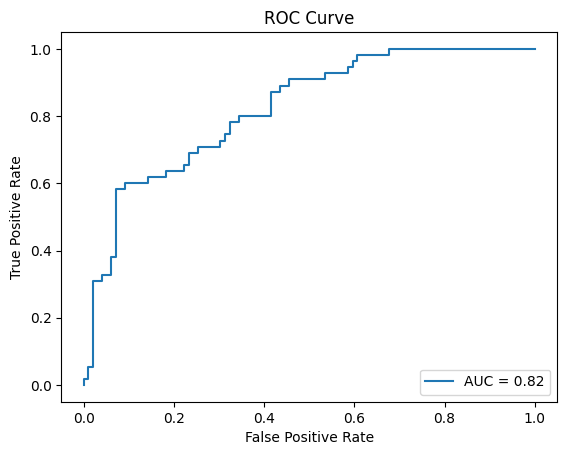

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def evaluate_model(y_true, y_pred, y_pred_proba):
    """Evaluate the model using several metrics."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"AUC-ROC: {auc}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Predictions and probabilities
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluate model performance
evaluate_model(y_test, y_pred, y_pred_proba)


## Question 3.
1. Take the best two features as per your observation from EDA and train the model
on those two features. Compare the model's results with the model trained on
complete data.

Iteration 0: Loss = 0.6931471805599454
Iteration 100: Loss = 20.258418828869054
Iteration 200: Loss = 3.0493741525605556
Iteration 300: Loss = nan
Iteration 400: Loss = 25.655699658329887
Iteration 500: Loss = nan
Iteration 600: Loss = 3.159197633042785
Iteration 700: Loss = nan
Iteration 800: Loss = 28.392056763294452
Iteration 900: Loss = 21.424320439695666
Iteration 1000: Loss = nan
Iteration 1100: Loss = 2.667028782560017
Iteration 1200: Loss = nan
Iteration 1300: Loss = 20.458605236051614
Iteration 1400: Loss = 3.0765526878932583
Iteration 1500: Loss = 27.978152338070025
Iteration 1600: Loss = nan
Iteration 1700: Loss = 6.004444097715972
Iteration 1800: Loss = 2.153813316656382
Iteration 1900: Loss = 3.1184221480705365
Accuracy: 0.6017316017316018
Precision: 0.2857142857142857
Recall: 0.1
F1-Score: 0.14814814814814817
AUC-ROC: 0.5597682119205298


<ipython-input-195-99ee74c0c4a3>:13: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * (np.dot(y_true, np.log(y_pred)) + np.dot(1-y_true, np.log(1-y_pred)))


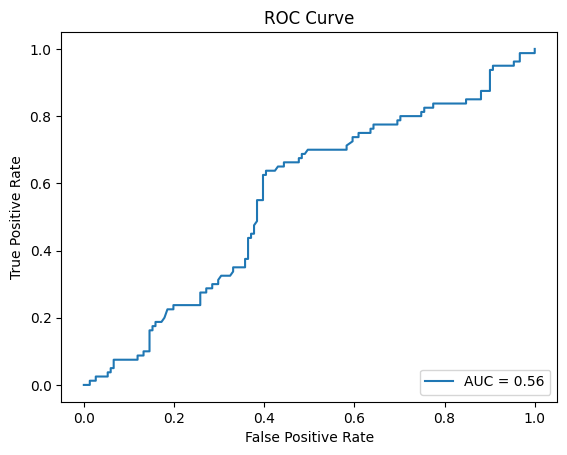

In [ ]:
# Extracting the best features based on EDA
X_best = df[['Glucose','SkinThickness']].values
y = df['Outcome'].values

# Splitting data into training and test sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.3, random_state=42)

# Logistic Regression using the best features
model_best = LogisticRegression(learning_rate=0.01, num_iterations=2000, regularization=None)
model_best.fit(X_train_best, y_train_best)

# Predictions and evaluation on test data
y_pred_best = model_best.predict(X_test_best)
y_pred_proba_best = model_best.predict_proba(X_test_best)

# Evaluate model with two features
evaluate_model(y_test_best, y_pred_best, y_pred_proba_best)


2. Plot the decision boundary (with the chosen two features as x and y axes) to
visualize how well the model separates the two classes.

Iteration 0: Loss = 0.6931471805599454
Iteration 100: Loss = 0.6889178350442969
Iteration 200: Loss = 0.6774821134595308
Iteration 300: Loss = 0.6742036425768917
Iteration 400: Loss = 0.6802736610886505
Iteration 500: Loss = 0.672182993212423
Iteration 600: Loss = 0.6752671388556644
Iteration 700: Loss = 0.6694603723338121
Iteration 800: Loss = 0.6716157006830559
Iteration 900: Loss = 0.6673124522705608
Iteration 1000: Loss = 0.6678141966854515
Iteration 1100: Loss = 0.6658846168798562
Iteration 1200: Loss = 0.6650438989421731
Iteration 1300: Loss = 0.6641548278020569
Iteration 1400: Loss = 0.6633326193520833
Iteration 1500: Loss = 0.6625855812707936
Iteration 1600: Loss = 0.6619271574861332
Iteration 1700: Loss = 0.6613777938210131
Iteration 1800: Loss = 0.6609707769672963
Iteration 1900: Loss = 0.6607658974060145


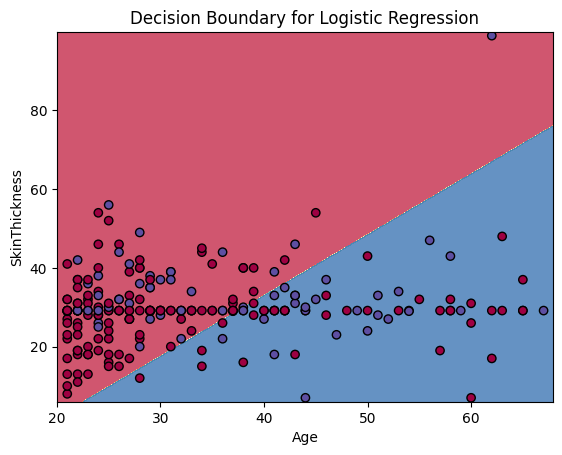

Accuracy: 0.6147
Precision: 0.4328
Recall: 0.3625
F1 Score: 0.3946
Confusion Matrix:
[[113  38]
 [ 51  29]]
ROC-AUC Score: 0.5377


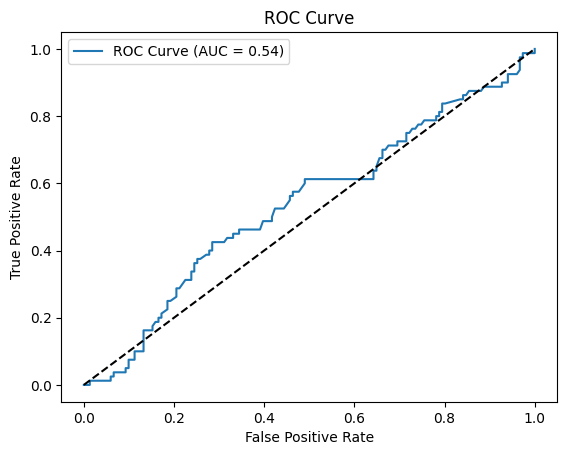

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model):
    """
    Plot the decision boundary for a logistic regression model with 2 features.

    Args:
    X -- Feature matrix (only two features)
    y -- True labels
    model -- Trained logistic regression model
    """
    # Define the grid over which we will visualize the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the entire grid using the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)

    # Scatter plot of the actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Spectral)
    plt.xlabel('Age')
    plt.ylabel('SkinThickness')
    plt.title('Decision Boundary for Logistic Regression')
    plt.show()

# Extract only Glucose and BMI for decision boundary visualization
X_two_features = df[['Age', 'SkinThickness']].values

# Splitting the two-feature dataset
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two_features, y, test_size=0.3, random_state=42)

# Train a logistic regression model on the two features (Glucose, BMI)
model_two = LogisticRegression(learning_rate=0.01, num_iterations=2000, regularization=None)
model_two.fit(X_train_two, y_train_two)

# Plot the decision boundary
plot_decision_boundary(X_test_two, y_test_two, model_two)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predictions on the test set
y_pred = model_two.predict(X_test_two)
y_pred_proba = model_two.predict_proba(X_test_two)

# Calculate Accuracy
accuracy = accuracy_score(y_test_two, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test_two, y_pred)
recall = recall_score(y_test_two, y_pred)
f1 = f1_score(y_test_two, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_two, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test_two, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_two, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

